# Plot SDS data availability

In [6]:
%run header.ipynb

transducersDF = LLE.get_transducers_dataframe(paths)
#print(transducersDF)

['6I.0XXXX.XX.HDH', '6I.12264.29.HDD', '6I.21498.82.HDD', '6I.21516.91.HDD', '6I.21516.92.BDD', '6S.02374.88.HDH', '6S.12264.19.HDD', '6S.12264.20.HDD', '6S.12264.21.HDD', '6S.12264.23.BDD', 'FL.BCHH2.10.HD4', 'FL.BCHH2.10.HD5', 'FL.BCHH2.10.HD6', 'FL.BCHH2.10.HD7', 'FL.BCHH2.10.HD8', 'FL.BCHH2.10.HD9', 'FL.BCHH4.00.HD2', 'FL.BCHH4.00.HD3', 'FL.BCHH4.00.HDF', 'FL.BCHH4.10.HHE', 'FL.BCHH4.10.HHN', 'FL.BCHH4.10.HHZ', 'FL.S39A1.00.HHE', 'FL.S39A1.00.HHN', 'FL.S39A1.00.HHZ', 'FL.S39A1.10.HDF', 'FL.S39A2.00.HHE', 'FL.S39A2.00.HHN', 'FL.S39A2.00.HHZ', 'FL.S39A2.10.HDF']
2022-07-21
2022-07-22
2022-07-23
2022-07-24
2022-07-25
2022-07-26
2022-07-27
2022-07-28
2022-07-29
2022-07-30
2022-07-31
2022-08-01
2022-08-02
2022-08-03
2022-08-04
2022-08-05
2022-08-06
2022-08-07
2022-08-08
2022-08-09
2022-08-10
2022-08-11
2022-08-12
2022-08-13
2022-08-14
2022-08-15
2022-08-16
2022-08-17
2022-08-18
2022-08-19
2022-08-20
2022-08-21
2022-08-22
2022-08-23
2022-08-24
2022-08-25
2022-08-26
2022-08-27
2022-08-28


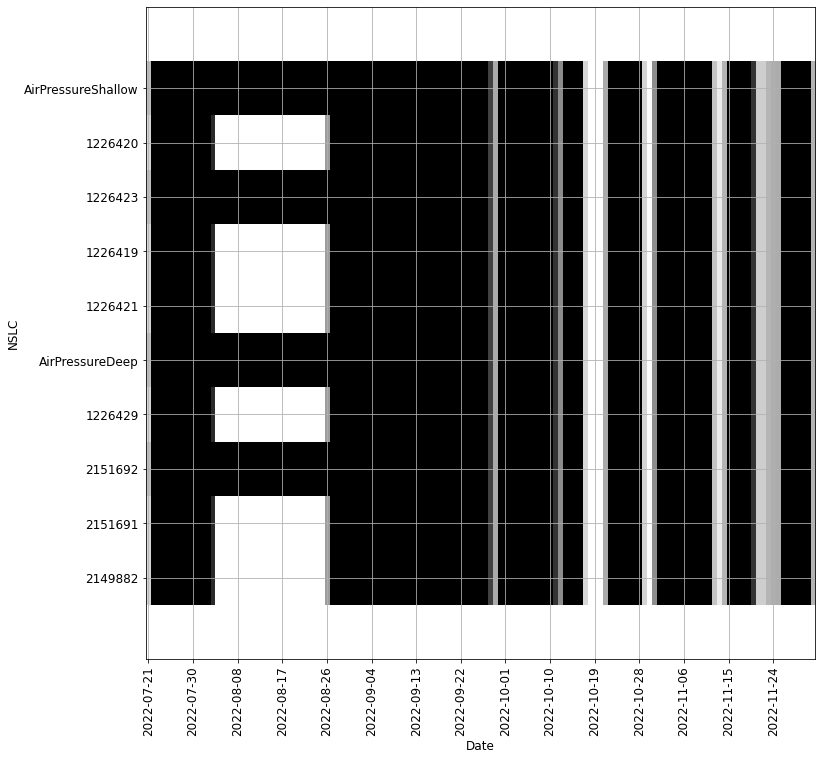

In [7]:
# Availability by day
startdate = UTCDateTime(2022,7,21)
enddate = UTCDateTime(2022,12,3)
sdsobj = SDS.SDSobj(paths['SDS_TOP'])
trace_ids = None

availabilityCSV = os.path.join(paths['outdir'], 'availability2.csv')
if os.path.isfile(availabilityCSV):
    availabilityDF = pd.read_csv(availabilityCSV, index_col=None)
    trace_ids = availabilityDF.columns[1:]
else:
    availabilityDF, trace_ids = sdsobj._sds_percent_available_per_day(startdate, enddate, trace_ids=trace_ids, speed=3)
    availabilityDF.to_csv(availabilityCSV, index=False)

#cols = availabilityDF.columns
#print(cols)
#print(trace_ids)

def reorder_trace_ids(df, ordered_ids):
    print(ordered_ids)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    d = df['date']
    df = df.loc[:, ordered_ids]
    df.insert(0, 'date', d)
    #df['date'] = d
    return df

well_availabilityDF = availabilityDF.copy()
for id in trace_ids:
    if id[0:2] =='FL':
        well_availabilityDF.drop(labels=id, axis=1, inplace=True)
well_availabilityDF = reorder_trace_ids(well_availabilityDF, transducersDF['id'].to_list())
#print(well_availabilityDF.columns)
sdsobj.plot_availability(well_availabilityDF, outfile=os.path.join(paths['outdir'],'well_availability.png'), labels=transducersDF.serial.to_list())

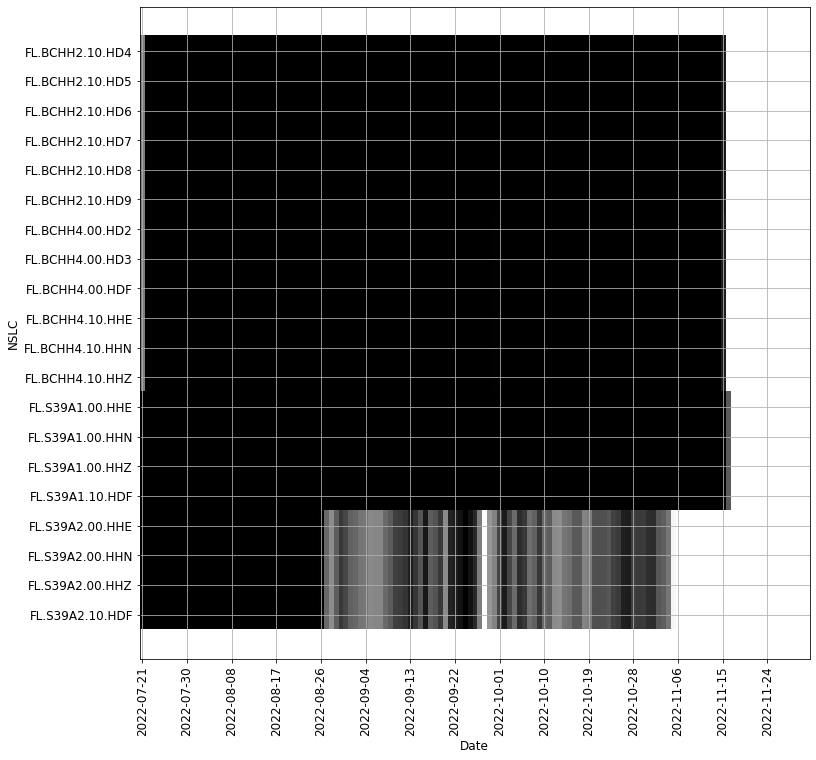

In [8]:
SA_availabilityDF = availabilityDF.copy()
for id in trace_ids:
    if id[0:2] !='FL':
        SA_availabilityDF.drop(labels=id, axis=1, inplace=True)
#print(SA_availabilityDF)
sdsobj.plot_availability(SA_availabilityDF, outfile=os.path.join(paths['outdir'],'SA_availability.png'))

Falcon 9 Block 5 | Starlink Group 4-35		September 24, 2022	SLC-40	23:32:10 UTC